# Trufl Assessment 

## Olivia Wang 

In [636]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import re
from statistics import mode
import warnings
warnings.filterwarnings("ignore")

## Load data

In [99]:
# change working directory
os.chdir("/Users/oliviawang/Documents/trufl_assessment")

In [100]:
office = pd.read_csv("the_office_lines_scripts.csv")

In [101]:
office.head()

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False


In [102]:
office.shape

(59909, 7)

In [103]:
# check for missing values
office.isnull().sum() # good 

id           0
season       0
episode      0
scene        0
line_text    0
speaker      0
deleted      0
dtype: int64

## Q1: How many characters are there? What are their names?

In [104]:
# lower case the names
speakers = office['speaker']
chars_lower = []
for name in speakers:
    chars_lower.append(name.lower())
chars_lower

['michael',
 'jim',
 'michael',
 'jim',
 'michael',
 'michael',
 'michael',
 'pam',
 'michael',
 'pam',
 'michael',
 'pam',
 'michael',
 'pam',
 'michael',
 'michael',
 'dwight',
 'jim',
 'michael',
 'jim',
 'michael',
 'dwight',
 'michael',
 'dwight',
 'michael',
 'jim',
 'michael',
 'jim',
 'michael',
 'jan',
 'michael',
 'jan',
 'michael',
 'jan',
 'michael',
 'jan',
 'michael',
 'pam',
 'michael',
 'pam',
 'michael',
 'jan',
 'michael',
 'jan',
 'michael',
 'jan',
 'michael',
 'jan',
 'michael',
 'jan',
 'michael',
 'jan',
 'michael',
 'michael',
 'jan',
 'michel',
 'todd packer',
 'michael',
 'todd packer',
 'michael',
 'todd packer',
 'michael',
 'jan',
 'michael',
 'phyllis',
 'stanley',
 'oscar',
 'angela',
 'kevin',
 'pam',
 'jim',
 'pam',
 'jim',
 'michael',
 'michael',
 'ryan',
 'pam',
 'michael',
 'ryan',
 'michael',
 'ryan',
 'michael',
 'pam',
 'pam',
 'jim',
 'dwight',
 'jim',
 'dwight',
 'jim',
 'dwight',
 'dwight',
 'jim',
 'dwight',
 'jim',
 'dwight',
 'dwight',
 'pam

### Filter out repeatitive characters 

In [105]:
filter1 = [" and ", " & ", "/", ", "]
chars_new1 = []
for i in chars_lower:
    for j in range(len(filter1)):
        if(filter1[j] in i):
            chars_new1 += i.split(filter1[j])
    if not any(t in i for t in filter1):
         chars_new1 += [i]
print(chars_new1)

['michael', 'jim', 'michael', 'jim', 'michael', 'michael', 'michael', 'pam', 'michael', 'pam', 'michael', 'pam', 'michael', 'pam', 'michael', 'michael', 'dwight', 'jim', 'michael', 'jim', 'michael', 'dwight', 'michael', 'dwight', 'michael', 'jim', 'michael', 'jim', 'michael', 'jan', 'michael', 'jan', 'michael', 'jan', 'michael', 'jan', 'michael', 'pam', 'michael', 'pam', 'michael', 'jan', 'michael', 'jan', 'michael', 'jan', 'michael', 'jan', 'michael', 'jan', 'michael', 'jan', 'michael', 'michael', 'jan', 'michel', 'todd packer', 'michael', 'todd packer', 'michael', 'todd packer', 'michael', 'jan', 'michael', 'phyllis', 'stanley', 'oscar', 'angela', 'kevin', 'pam', 'jim', 'pam', 'jim', 'michael', 'michael', 'ryan', 'pam', 'michael', 'ryan', 'michael', 'ryan', 'michael', 'pam', 'pam', 'jim', 'dwight', 'jim', 'dwight', 'jim', 'dwight', 'dwight', 'jim', 'dwight', 'jim', 'dwight', 'dwight', 'pam', 'michael', 'pam', 'michael', 'pam', 'michael', 'pam', 'michael', 'michael', 'michael', 'micha

In [106]:
# filter again
chars_new2 = []
for i in chars_new1:
    for j in range(len(filter1)):
        if(filter1[j] in i):
            chars_new2 += i.split(filter1[j])
    if not any(t in i for t in filter1):
         chars_new2 += [i]
print(chars_new2)

['michael', 'jim', 'michael', 'jim', 'michael', 'michael', 'michael', 'pam', 'michael', 'pam', 'michael', 'pam', 'michael', 'pam', 'michael', 'michael', 'dwight', 'jim', 'michael', 'jim', 'michael', 'dwight', 'michael', 'dwight', 'michael', 'jim', 'michael', 'jim', 'michael', 'jan', 'michael', 'jan', 'michael', 'jan', 'michael', 'jan', 'michael', 'pam', 'michael', 'pam', 'michael', 'jan', 'michael', 'jan', 'michael', 'jan', 'michael', 'jan', 'michael', 'jan', 'michael', 'jan', 'michael', 'michael', 'jan', 'michel', 'todd packer', 'michael', 'todd packer', 'michael', 'todd packer', 'michael', 'jan', 'michael', 'phyllis', 'stanley', 'oscar', 'angela', 'kevin', 'pam', 'jim', 'pam', 'jim', 'michael', 'michael', 'ryan', 'pam', 'michael', 'ryan', 'michael', 'ryan', 'michael', 'pam', 'pam', 'jim', 'dwight', 'jim', 'dwight', 'jim', 'dwight', 'dwight', 'jim', 'dwight', 'jim', 'dwight', 'dwight', 'pam', 'michael', 'pam', 'michael', 'pam', 'michael', 'pam', 'michael', 'michael', 'michael', 'micha

In [107]:
# frequency of each name after filtering 
name_freq = pd.Series(chars_new2).value_counts()
pd.set_option('display.max_rows', None)
name_freq = pd.DataFrame(name_freq).reset_index()
name_freq.columns = ['name', 'count']
name_freq

,name,count
0,michael,12194
1,dwight,7583
2,jim,6847
3,pam,5399
4,andy,4009
5,kevin,1723
6,angela,1703
7,oscar,1499
8,erin,1482
9,ryan,1384


In [108]:
unique_chars = list(set(chars_new2))
unique_chars

['teacher',
 'pretzel guy',
 'employees',
 'wrangler',
 'henry',
 'mary-beth',
 'craig',
 'man',
 'phylis',
 'christian',
 'college student',
 'professor powell',
 'dunmiff',
 'female church member',
 'narrator',
 'business student #3',
 'girl in club',
 'business student #2',
 'guy',
 'limo driver',
 'trevor',
 'holy',
 'sam',
 'store employee',
 'staples guy',
 'carla',
 'michel',
 'lefevre',
 'kathy',
 'clark',
 "ryan's voicemail",
 'lester',
 'prince son',
 'micahel',
 'rehab nurse',
 'girl at table',
 'school official',
 'business student #1',
 'patty',
 'usher',
 'mose',
 'tattoo artist',
 '[clark',
 'hct member #2',
 'shelby',
 'christian slater',
 "bob's secretary",
 'justin',
 'receptionitis15',
 'andy',
 'entire office',
 'julia',
 'mr. schofield',
 'male voice',
 'senator lipton',
 'astrid',
 'producer',
 'master',
 'erin',
 'salesman',
 'guy at table',
 'david',
 'female athlead employee',
 'marcy',
 'co-worker',
 'larry',
 'front desk clerk',
 'passer-by',
 'man on phone',

In [109]:
len(unique_chars)

708

### other repeatitive characters, including spelling mistakes and etc.

In [167]:
filter2 = ["oscar's voice from the computer", 'dight', 'crowd', 'anglea', 
           'meridith', 'group',  "i'm clark! i like to eat toilet paper. [clark",  
           'phyliss', 'denagelo', 'deagnelo',  'all',  'all the men',  'david wallcve', 
           'others','michae', 'all but oscar', 'and dwight', 'micheal', 'mihael', 'gil', 
           'daryl', 'dwight:', 'michael [on phone]', 'dwight.', 'everyone', 
           'pam as fourth-biggest client', 'dacvid wallace',  'offscreen', 'carroll',  
           'everybody', '[repeats]\nandy: fail', 'and darryl', 'pete are shown on screen]\nvideo andy: hey', 'carol', 
           'dwight [on phone]', 'pete wave at camera] we fail! [video shows memorial of jerry',
           'dwightkschrute', "i'm pete", 'micael', 'michel', 'employees except dwight', 'pam [on phone]', 'both', 'carrol', 
           'fart noise follows] fail. [repeats] fail', 'micahel', 'michal', 'jan [on phone]', 'phylis','[clark', 'm ichael',
           'puberty is such a drag',  'group chant', 'group: dunder mifflin!\nandy: andy bernard presents: summer softball epic fails! [kevin swings bat on screen',
           'miichael', 'together', 'meemaw', 'dunmiff', 'holly,', 'man.', 'sys', 'vance refrigeration', 'josh,']

index_list2 = [unique_chars.index(i) for i in unique_chars for j in filter2 if j == i]

In [168]:
for i in sorted(index_list2, reverse=True):
...     del unique_chars[i]

In [169]:
len(unique_chars)

645

In [162]:
unique_chars

['teacher',
 'pretzel guy',
 'employees',
 'wrangler',
 'henry',
 'mary-beth',
 'craig',
 'man',
 'christian',
 'college student',
 'professor powell',
 'female church member',
 'narrator',
 'business student #3',
 'girl in club',
 'business student #2',
 'guy',
 'limo driver',
 'trevor',
 'holy',
 'sam',
 'store employee',
 'staples guy',
 'carla',
 'lefevre',
 'kathy',
 'clark',
 "ryan's voicemail",
 'lester',
 'prince son',
 'rehab nurse',
 'girl at table',
 'school official',
 'business student #1',
 'patty',
 'usher',
 'mose',
 'tattoo artist',
 'hct member #2',
 'shelby',
 'christian slater',
 "bob's secretary",
 'justin',
 'receptionitis15',
 'andy',
 'entire office',
 'julia',
 'mr. schofield',
 'male voice',
 'senator lipton',
 'astrid',
 'producer',
 'master',
 'erin',
 'salesman',
 'guy at table',
 'david',
 'female athlead employee',
 'marcy',
 'co-worker',
 'larry',
 'front desk clerk',
 'passer-by',
 'man on phone',
 'delivery man',
 'bartender',
 'curtis',
 "hayworth's w

 There are 645 characters.

## Q2: Who has the most lines?

In [21]:
top10_chars = office['speaker'].value_counts()[:10]
top10_chars = pd.DataFrame(top10_chars).reset_index()
top10_chars.columns = ['name', 'line_count']
top10_chars

,name,line_count
0,Michael,12140
1,Dwight,7531
2,Jim,6816
3,Pam,5376
4,Andy,3968
5,Kevin,1708
6,Angela,1695
7,Oscar,1490
8,Erin,1469
9,Ryan,1379


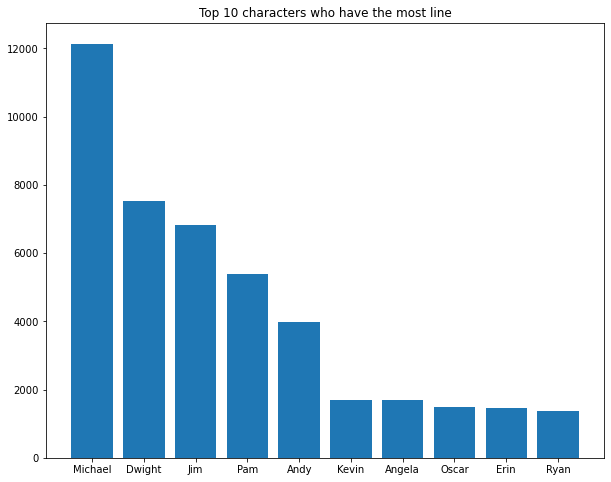

In [205]:
plt.figure(figsize = (10, 8))
plt.bar(top10_chars['name'], top10_chars['line_count'])
plt.title('Top 10 characters who have the most line')
plt.show()

According to the plot above, Michael has the most lines.

## Q3: What is the average of words per line for each character?

In [141]:
# lower case for the 'speaker' column
office['speaker'] = chars_lower
office.head()

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,all right jim. your quarterlies look very good...,michael,False
1,2,1,1,1,"oh, i told you. i couldn't close it. so...",jim,False
2,3,1,1,1,so you've come to the master for guidance? is ...,michael,False
3,4,1,1,1,"actually, you called me in here, but yeah.",jim,False
4,5,1,1,1,"all right. well, let me show you how it's done.",michael,False


In [142]:
# define a function to count the number of words in each line
def count_words(string):
    word_list = string.split()
    num_of_words = len(word_list)
    return(num_of_words)

In [143]:
lines = office['line_text']
lines.head()

0    all right jim. your quarterlies look very good...
1           oh, i told you. i couldn't close it. so...
2    so you've come to the master for guidance? is ...
3           actually, you called me in here, but yeah.
4      all right. well, let me show you how it's done.
Name: line_text, dtype: object

In [144]:
# use for loop to calculate the average of words per line for each character
ave_num_words = []
for name in unique_chars:
    ave_num_words.append(office.loc[office['speaker'] == name]['line_text'].apply(count_words).mean())

ave_num_words
    

[32.25,
 15.333333333333334,
 26.0,
 5.5,
 14.333333333333334,
 7.411764705882353,
 11.0,
 8.4,
 8.842105263157896,
 1.0,
 7.75,
 14.0,
 25.0,
 5.5,
 5.4,
 13.666666666666666,
 6.758620689655173,
 6.75,
 10.161290322580646,
 10.0,
 19.5,
 10.0,
 9.0,
 10.2,
 14.181818181818182,
 6.7,
 10.061538461538461,
 26.0,
 15.346153846153847,
 14.0,
 4.0,
 1.5,
 5.75,
 12.25,
 1.0,
 14.0,
 4.612903225806452,
 6.25,
 8.5,
 5.125,
 67.0,
 7.5,
 4.428571428571429,
 6.0,
 12.735635080645162,
 1.0,
 6.461538461538462,
 6.0,
 4.0,
 6.25,
 2.6666666666666665,
 6.666666666666667,
 8.11111111111111,
 9.78488767869299,
 6.363636363636363,
 3.3333333333333335,
 10.866492146596858,
 8.5,
 7.333333333333333,
 11.0,
 4.5,
 6.6,
 2.8,
 12.666666666666666,
 5.0,
 6.583333333333333,
 8.0,
 4.75,
 9.0,
 9.0,
 5.0,
 14.866666666666667,
 2.0,
 5.0,
 8.0,
 5.0,
 12.3,
 9.428571428571429,
 11.363636363636363,
 2.5,
 10.76923076923077,
 7.0588235294117645,
 10.666666666666666,
 25.0,
 10.394099051633297,
 8.26666666666

In [145]:
ave_words = pd.DataFrame(ave_num_words, unique_chars).reset_index()
ave_words.columns = ['name', 'average_words_per_line']
ave_words

,name,average_words_per_line
0,teacher,32.250000
1,pretzel guy,15.333333
2,employees,26.000000
3,wrangler,5.500000
4,henry,14.333333
5,mary-beth,7.411765
6,craig,11.000000
7,man,8.400000
8,christian,8.842105
9,college student,1.000000


Above is a data frame showing the average words per line for each character

In [146]:
# top 10 characters who have the most average words per line
ave_words.sort_values('average_words_per_line', ascending = False).head(10)

,name,average_words_per_line
102,michael's ad,146.0
313,amanda,77.0
40,christian slater,67.0
595,finger lakes guy,60.0
599,david brent,59.5
255,promo voice,52.0
508,council,43.0
446,radio,41.0
217,hooter's girls,40.0
447,hunter's cd,40.0


## Q4: What is the most common word per character

In [163]:
# lower case the lines
office['line_text'] = office['line_text'].str.lower()

In [164]:
office.head()

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,all right jim. your quarterlies look very good...,michael,False
1,2,1,1,1,"oh, i told you. i couldn't close it. so...",jim,False
2,3,1,1,1,so you've come to the master for guidance? is ...,michael,False
3,4,1,1,1,"actually, you called me in here, but yeah.",jim,False
4,5,1,1,1,"all right. well, let me show you how it's done.",michael,False


In [171]:
# loop through the unique characters' names to find out the most common word for each character
for name in unique_chars:
    test_list = list(office.loc[office['speaker'] == name]['line_text'])
    temp = [wrd for sub in test_list for wrd in sub.split()]
    res = mode(temp)
    print(name + ": " + str(res))

teacher: i
pretzel guy: we
employees: stop
wrangler: turn
henry: hat]
mary-beth: i
craig: i
man: i
christian: i
college student: ....dude.
professor powell: um,
female church member: for
narrator: the
business student #3: how
girl in club: i've
business student #2: a
guy: i
limo driver: car
trevor: i
holy: i'm
sam: i
store employee: ma'am?
staples guy: you
carla: you
lefevre: to
kathy: i
clark: i
ryan's voicemail: new
lester: you
prince son: no,
rehab nurse: can
girl at table: hi.
school official: with
business student #1: in
patty: yes.
usher: excuse
mose: to
tattoo artist: you
hct member #2: i
shelby: a
christian slater: the
bob's secretary: just
justin: you
receptionitis15: where?
andy: i
entire office: hot!
julia: a
mr. schofield: a
male voice: ...thank
senator lipton: a
astrid: mommy!
producer: um,
master: your
erin: i
salesman: we
guy at table: what?
david: you
female athlead employee: science
marcy: you
co-worker: jim.
larry: sir,
front desk clerk: i'm
passer-by: yeah?
man on ph

reporter #2: question
male applicant 1: wait,
i.d. photographer: off.
abe: i
manager: you
wendy's phone operator: to
mrs. davis: on
gym instructor: just
oscar's friend: whoo!
officer foley: that
secretary: be
holly's mom: your
woman from buffalo: david,
policeman: pull
robert dunder: i,
isabel: you
mark: the
rachel: i
nate: i
office: aw,
hct member #3: i
co-workers: toby!
brad: to
man 1: how
fred: i
office staff: happy
prince: grandfather:
woman 4: how
senator liptop: i
woman over speakerphone: do
mr. halpert: so,
vrg 2: what
nellie bertram: first,
walt jr.: i
friend: my
girl in 2nd club: just
co-worker 3: really?
dance teacher: ladies
melissa: you
new instant message: stone
hotel manager: the
chad lite: uh---
senator: i
charles: you
vance refrigeration worker #2: ass,
meredith's vet: hey.
lonny: what
tall girl #1: me.
dan: and
party announcer: and
member: it
finger lakes guy: i
darryl: i
stanely: [on
everyone watching: oh!
david brent: a
hot dog guy: i'm
church congregation: [singing]

Above is a list of characters' names and their most common words.

## Q5: Number of episodes where the character does not have a line, for each character

Use totel number of episode minus the number of episode each character has a line 

In [210]:
office.head(10)

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,all right jim. your quarterlies look very good...,michael,False
1,2,1,1,1,"oh, i told you. i couldn't close it. so...",jim,False
2,3,1,1,1,so you've come to the master for guidance? is ...,michael,False
3,4,1,1,1,"actually, you called me in here, but yeah.",jim,False
4,5,1,1,1,"all right. well, let me show you how it's done.",michael,False
5,6,1,1,2,"[on the phone] yes, i'd like to speak to your ...",michael,False
6,7,1,1,3,"i've, uh, i've been at dunder mifflin for 12 y...",michael,False
7,8,1,1,3,well. i don't know.,pam,False
8,9,1,1,3,"if you think she's cute now, you should have s...",michael,False
9,10,1,1,3,what?,pam,False


In [222]:
season_sum = office.groupby('season').nunique()
season_sum

,id,episode,scene,line_text,speaker,deleted
season,,,,,,
1,1996,6,60,1835,32,2
2,7492,22,84,6755,131,2
3,7483,23,88,6737,117,2
4,5642,14,103,5140,117,1
5,8170,26,116,7379,141,1
6,7630,24,78,6910,148,1
7,7302,24,80,6696,152,1
8,7083,24,60,6522,136,1
9,7111,23,116,6493,193,1


In [224]:
season_sum['episode'].sum()

186

There are 186 episode in total.

In [443]:
# function to extract out each episode from each season
def sea_epi(num1, num2):
    sipj = office[(office['season'] == num1) & (office['episode'] == num2)]
    return(sipj)

In [256]:
season_num = office['season'].unique()
season_num

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [319]:
max_epi_num = max(season_sum['episode'])
res = []
for i in season_num:
    for j in range(1, (max_epi_num + 1)):
        res += list(sea_epi(i, j)['speaker'].unique())
res = pd.Series(res)

epi_line = res.value_counts().reset_index()
epi_line.columns = ['characters', 'number_of_episode_with_lines']
epi_line

,characters,number_of_episode_with_lines
0,dwight,186
1,jim,185
2,pam,182
3,kevin,180
4,angela,175
5,stanley,171
6,phyllis,169
7,oscar,166
8,andy,144
9,kelly,143


In [320]:
epi_line['number_of_episode_w/o_line'] = 186 - num_epi_w_line['number_of_episode_with_lines']

In [323]:
epi_line[['characters', 'number_of_episode_w/o_line']]

,characters,number_of_episode_w/o_line
0,dwight,0
1,jim,1
2,pam,4
3,kevin,6
4,angela,11
5,stanley,15
6,phyllis,17
7,oscar,20
8,andy,42
9,kelly,43


Above table shows the number of episodes where each character does not have a line.

## Q6: Number of time "That's what she said" joke comes up

In [392]:
line_list = list(lines)
filter3 = "that's what she said"

index = []
index = [line_list.index(i) for i in line_list if filter3 in i ]
len(index)

37

There're 37 times "That's what she said" joke comes up.

In [396]:
# example 1
office.iloc[2544,]

id                                 2545
season                                2
episode                               2
scene                                24
line_text    that's what she said. pam?
speaker                         michael
deleted                           False
Name: 2544, dtype: object

In [398]:
# example 2
office.iloc[10903,]

id                                                       10904
season                                                       3
episode                                                      5
scene                                                       59
line_text    that's what she said. [stanley and michael bot...
speaker                                                stanley
deleted                                                  False
Name: 10903, dtype: object

In [399]:
# example 3
office.iloc[8871,]

id                                                        8872
season                                                       2
episode                                                     21
scene                                                       22
line_text    that's what she said. [jim mouths these words ...
speaker                                                michael
deleted                                                  False
Name: 8871, dtype: object

In [401]:
# example 4
office.iloc[20715,]

id                                                       20716
season                                                       4
episode                                                      9
scene                                                       19
line_text    [yells] that's what she said! [jan gets an evi...
speaker                                                michael
deleted                                                  False
Name: 20715, dtype: object

In [404]:
# example 5
office.iloc[6321, ]

id                            6322
season                           2
episode                         12
scene                           33
line_text    that's what she said.
speaker                     dwight
deleted                      False
Name: 6321, dtype: object

## Q7: The average percent of lines each character contributed each episode per season.

In [432]:
# function to extract out each season
#def sea(num):
#    si = office[(office['season'] == num)]
#    return(si)

In [454]:
season_sum

,id,episode,scene,line_text,speaker,deleted
season,,,,,,
1,1996,6,60,1835,32,2
2,7492,22,84,6755,131,2
3,7483,23,88,6737,117,2
4,5642,14,103,5140,117,1
5,8170,26,116,7379,141,1
6,7630,24,78,6910,148,1
7,7302,24,80,6696,152,1
8,7083,24,60,6522,136,1
9,7111,23,116,6493,193,1


### Season 1

In [499]:
# Season 1
sea1_num_epi = season_sum['episode'][1]
s1e1 = sea_epi(1, 1)
s1_per = s1e1['speaker'].value_counts() / len(s1e1) # initilize with the first episode 
for epi in range(2, sea1_num_epi):
    s1ei = sea_epi(1, epi)
    s1ei_per = s1ei['speaker'].value_counts() / len(s1ei)
    s1_per = s1_per.append(s1ei_per)
    s1_per

s1_per = pd.DataFrame(s1_per).reset_index()
s1_per.columns = ['speaker', 'percentage of line']
s1_ave_per = s1_per.groupby('speaker').mean().reset_index()
s1_ave_per.columns = ['speaker', 'average percentage of line']
s1_ave_per

,speaker,average percentage of line
0,angela,0.018330
1,darryl,0.054487
2,documentary crew member,0.011111
3,dwight,0.177140
4,everybody,0.011538
5,jan,0.050000
6,jim,0.138469
7,kelly,0.006734
8,kevin,0.014803
9,lonny,0.016026


### Season 2

In [604]:
sea2_num_epi = season_sum['episode'][2]
s2e1 = sea_epi(2, 1)
s2_per = s2e1['speaker'].value_counts() / len(s2e1) # initilize with the first episode 
for epi in range(2, sea2_num_epi):
    s2ei = sea_epi(2, epi)
    s2ei_per = s2ei['speaker'].value_counts() / len(s2ei)
    s2_per = s2_per.append(s2ei_per)
    s2_per

s2_per = pd.DataFrame(s2_per).reset_index()
s2_per.columns = ['speaker', 'percentage of line']
s2_ave_per = s2_per.groupby('speaker').mean().reset_index()
s2_ave_per.columns = ['speaker', 'average percentage of line']
s2_ave_per

,speaker,average percentage of line
0,abby,0.058104
1,actor,0.004331
2,actress,0.002451
3,albiny,0.006211
4,all,0.002915
5,all the men,0.003226
6,alyssa,0.003040
7,angela,0.022190
8,anglea,0.003279
9,bill,0.009834


### Season 3

In [620]:
sea3_num_epi = season_sum['episode'][3]
s3e1 = sea_epi(3, 1)
s3_per = s3e1['speaker'].value_counts() / len(s3e1) # initilize with the first episode 
for epi in range(2, sea3_num_epi):
    s3ei = sea_epi(3, epi)
    s3ei_per = s3ei['speaker'].value_counts() / len(s3ei)
    s3_per = s3_per.append(s3ei_per)
    s3_per

s3_per = pd.DataFrame(s3_per).reset_index()
s3_per.columns = ['speaker', 'percentage of line']
s3_ave_per = s3_per.groupby('speaker').mean().reset_index()
s3_ave_per.columns = ['speaker', 'average percentage of line']
s3_ave_per

,speaker,average percentage of line
0,alan,0.023881
1,all,0.002740
2,andy,0.065451
3,andy & michael,0.003425
4,andy and jim,0.014337
5,andy and michael,0.001828
6,angela,0.033367
7,announcer,0.003205
8,artist,0.003922
9,barbara,0.035176


### Season 4

In [622]:
sea4_num_epi = season_sum['episode'][4]
s4e1 = sea_epi(4, 1)
s4_per = s4e1['speaker'].value_counts() / len(s4e1) # initilize with the first episode 
for epi in range(2, sea4_num_epi):
    s4ei = sea_epi(4, epi)
    s4ei_per = s4ei['speaker'].value_counts() / len(s4ei)
    s4_per = s4_per.append(s4ei_per)
    s4_per

s4_per = pd.DataFrame(s4_per).reset_index()
s4_per.columns = ['speaker', 'percentage of line']
s4_ave_per = s4_per.groupby('speaker').mean().reset_index()
s4_ave_per.columns = ['speaker', 'average percentage of line']
s4_ave_per

,speaker,average percentage of line
0,ad guy 1,0.044610
1,ad guy 2,0.022305
2,air force recruiter,0.007937
3,all,0.004828
4,all girls,0.002762
5,amy,0.004878
6,andy,0.043014
7,"andy, creed, kevin, kelly",0.018587
8,"andy, creed, kevin, kelly, darryl",0.003717
9,angela,0.028258


### Season 5

In [624]:
sea5_num_epi = season_sum['episode'][5]
s5e1 = sea_epi(5, 1)
s5_per = s5e1['speaker'].value_counts() / len(s5e1) # initilize with the first episode 
for epi in range(2, sea5_num_epi):
    s5ei = sea_epi(5, epi)
    s5ei_per = s5ei['speaker'].value_counts() / len(s5ei)
    s5_per = s5_per.append(s5ei_per)
    s5_per

s5_per = pd.DataFrame(s5_per).reset_index()
s5_per.columns = ['speaker', 'percentage of line']
s5_ave_per = s5_per.groupby('speaker').mean().reset_index()
s5_ave_per.columns = ['speaker', 'average percentage of line']
s5_ave_per

,speaker,average percentage of line
0,a.j.,0.031496
1,alex,0.023981
2,all,0.003576
3,andy,0.065522
4,angela,0.032110
5,angela and kelly,0.003745
6,automated phone voice,0.003356
7,beth,0.012308
8,blonde,0.020000
9,blood drive worker,0.026667


### Season 6

In [628]:
sea6_num_epi = season_sum['episode'][6]
s6e1 = sea_epi(6, 1)
s6_per = s6e1['speaker'].value_counts() / len(s6e1) # initilize with the first episode 
for epi in range(2, sea6_num_epi):
    s6ei = sea_epi(6, epi)
    s6ei_per = s6ei['speaker'].value_counts() / len(s6ei)
    s6_per = s6_per.append(s6ei_per)
    s6_per

s6_per = pd.DataFrame(s6_per).reset_index()
s6_per.columns = ['speaker', 'percentage of line']
s6_ave_per = s6_per.groupby('speaker').mean().reset_index()
s6_ave_per.columns = ['speaker', 'average percentage of line']
s6_ave_per

,speaker,average percentage of line
0,(pam's mom) heleen,0.001600
1,alan,0.044944
2,all,0.003418
3,andy,0.069688
4,andy & erin,0.007576
5,andy & michael,0.003012
6,andy and dwight,0.008585
7,angela,0.019343
8,bar manager,0.061281
9,bob,0.002994


### Season 7

In [630]:
sea7_num_epi = season_sum['episode'][7]
s7e1 = sea_epi(7, 1)
s7_per = s7e1['speaker'].value_counts() / len(s7e1) # initilize with the first episode 
for epi in range(2, sea7_num_epi):
    s7ei = sea_epi(7, epi)
    s7ei_per = s7ei['speaker'].value_counts() / len(s7ei)
    s7_per = s7_per.append(s7ei_per)
    s7_per

s7_per = pd.DataFrame(s7_per).reset_index()
s7_per.columns = ['speaker', 'percentage of line']
s7_ave_per = s7_per.groupby('speaker').mean().reset_index()
s7_ave_per.columns = ['speaker', 'average percentage of line']
s7_ave_per

,speaker,average percentage of line
0,abe,0.003040
1,aj,0.025084
2,all,0.007383
3,all but oscar,0.003891
4,andy,0.077953
5,andy and erin,0.002841
6,angel,0.003731
7,angela,0.022890
8,another guy,0.003497
9,astrid,0.009346


### Season 8

In [632]:
sea8_num_epi = season_sum['episode'][8]
s8e1 = sea_epi(8, 1)
s8_per = s8e1['speaker'].value_counts() / len(s8e1) # initilize with the first episode 
for epi in range(2, sea8_num_epi):
    s8ei = sea_epi(8, epi)
    s8ei_per = s8ei['speaker'].value_counts() / len(s8ei)
    s8_per = s8_per.append(s8ei_per)
    s8_per

s8_per = pd.DataFrame(s8_per).reset_index()
s8_per.columns = ['speaker', 'percentage of line']
s8_ave_per = s8_per.groupby('speaker').mean().reset_index()
s8_ave_per.columns = ['speaker', 'average percentage of line']
s8_ave_per

,speaker,average percentage of line
0,all,0.005101
1,alonzo,0.003831
2,amanda,0.003546
3,andy,0.157607
4,andy & erin,0.003425
5,andy & walter,0.011236
6,andy and darryl,0.009346
7,"andy, darryl & officer foley",0.002688
8,andy/oscar,0.003344
9,andy/pam,0.003086


### Season 9

In [634]:
sea9_num_epi = season_sum['episode'][9]
s9e1 = sea_epi(9, 1)
s9_per = s9e1['speaker'].value_counts() / len(s9e1) # initilize with the first episode 
for epi in range(2, sea9_num_epi):
    s9ei = sea_epi(9, epi)
    s9ei_per = s9ei['speaker'].value_counts() / len(s9ei)
    s9_per = s9_per.append(s9ei_per)
    s9_per

s9_per = pd.DataFrame(s9_per).reset_index()
s9_per.columns = ['speaker', 'percentage of line']
s9_ave_per = s9_per.groupby('speaker').mean().reset_index()
s9_ave_per.columns = ['speaker', 'average percentage of line']
s9_ave_per

,speaker,average percentage of line
0,3rd athlead employee,0.003731
1,4th athlead employee,0.003731
2,[clark and pete are shown on screen]\nvideo an...,0.003165
3,[repeats]\nandy: fail,0.003165
4,aaron rodgers,0.007984
5,alice,0.037924
6,all,0.007031
7,andy,0.131071
8,angela,0.051046
9,angela & oscar,0.003568


### Q8: Who says "That's what she said" the joke the most?

In [640]:
# Indicies of lines contain "that's what she said" from Q6
office_sub = office.iloc[index,]
office_sub

,id,season,episode,scene,line_text,speaker,deleted
2544,2545,2,2,24,that's what she said. pam?,michael,False
2590,2591,2,2,34,does that include 'that's what she said'?,jim,False
2593,2594,2,2,34,that's what she said!,michael,False
5324,5325,2,10,2,"a, that's what she said, and b, i wanted it to...",michael,False
6321,6322,2,12,33,that's what she said.,dwight,False
6352,6353,2,12,38,"uh, that's what she said. see, haven't lost m...",michael,True
2593,2594,2,2,34,that's what she said!,michael,False
8871,8872,2,21,22,that's what she said. [jim mouths these words ...,michael,False
9623,9624,3,1,49,i am glad that today spurred social change. t...,michael,False
10903,10904,3,5,59,that's what she said. [stanley and michael bot...,stanley,False


In [646]:
twss_chars = pd.DataFrame(office_sub['speaker'].value_counts()).reset_index()
twss_chars.columns = ['speaker', 'count']
twss_chars

,speaker,count
0,michael,20
1,dwight,9
2,jim,1
3,stanley,1
4,jan,1
5,deposition reporter,1
6,pam,1
7,david,1
8,holly,1
9,creed,1


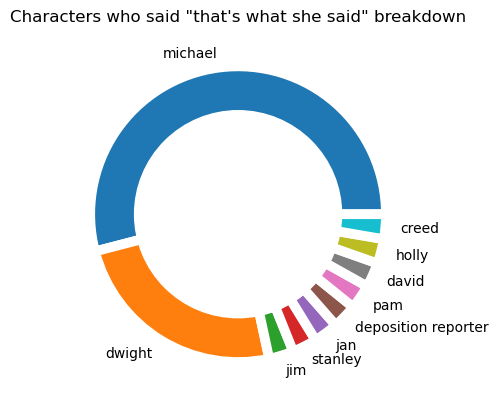

In [653]:
my_circle = plt.Circle( (0,0), 0.7, color ='white')

# Custom wedges
plt.pie(twss_chars['count'], labels = twss_chars['speaker'], wedgeprops ={'linewidth': 7, 'edgecolor': 'white'})
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Characters who said "that' + "'" + 's what she said" breakdown')
plt.show()


### Q9: Top 10 characters have the most lines per season

In [694]:
lines_sea = office.groupby(['season', 'speaker'])[['line_text']].count().reset_index()
lines_sea.sort_values(by=['season', 'line_text'], ascending=[True, False], inplace=True)
lines_sea = lines_season.groupby('season').head(10)

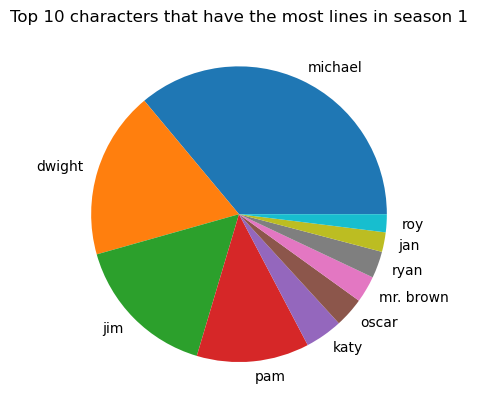

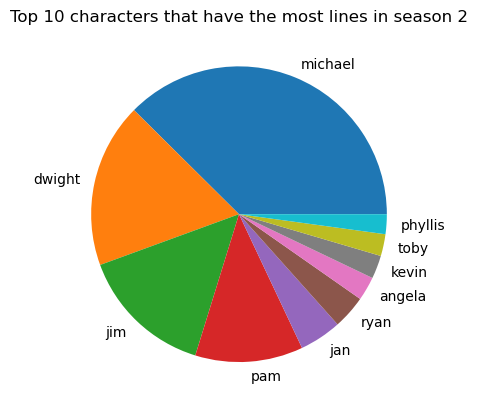

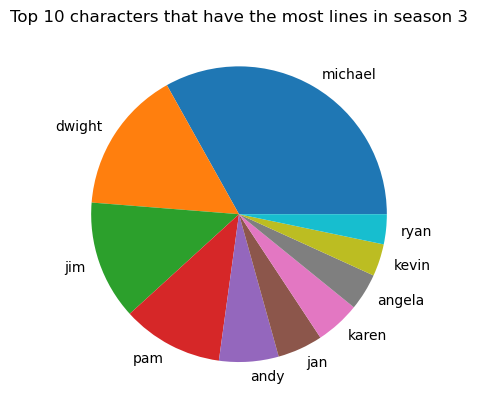

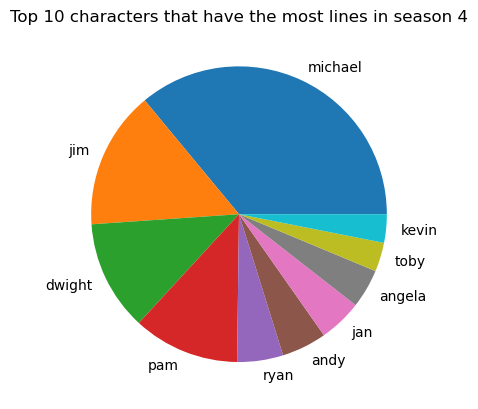

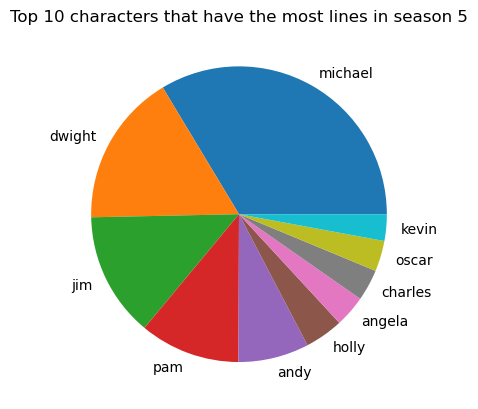

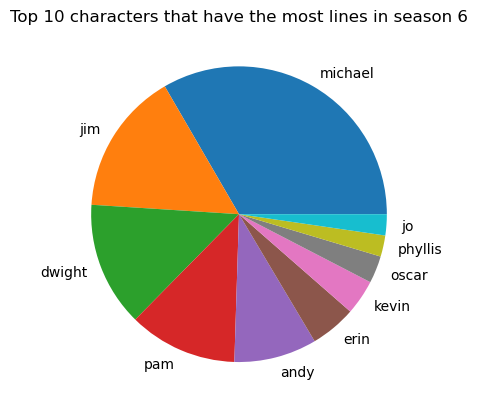

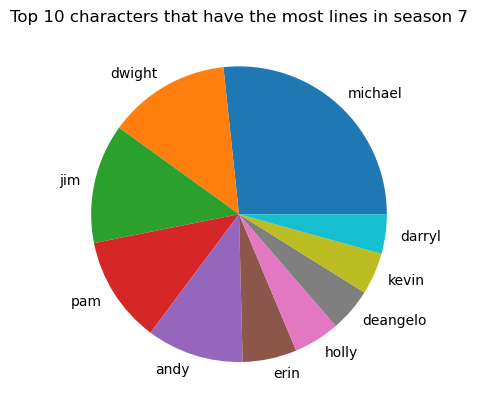

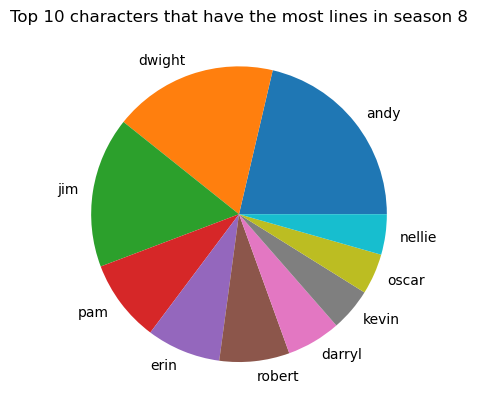

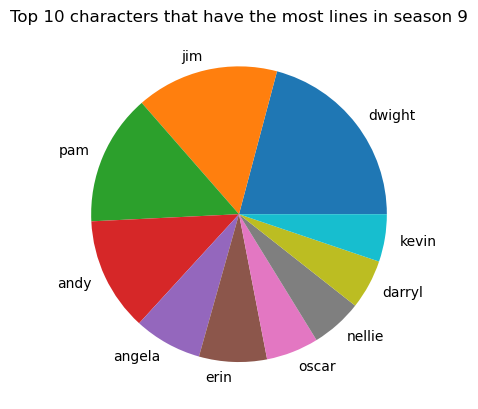

In [695]:

fig.suptitle("Top 10 The Office Characters with the Most Lines per Season", fontsize=16)

for i in range(1, 10):
    df = lines_sea[lines_sea['season'] == i]
    plt.pie(df['line_text'], labels = df['speaker'])
    plt.title("Top 10 characters that have the most lines in season " + str(i))
    plt.show()